In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import yfinance as yf
import datetime
import MetaTrader5 as mt5

In [28]:
mt5.initialize()

True

In [29]:
symbol = 'XAUUSD'
timeframe = mt5.TIMEFRAME_M1
start_pos = 0
num_bars = 1000

In [30]:
bars = mt5.copy_rates_from_pos(symbol, timeframe, start_pos, num_bars)
df = pd.DataFrame(bars)

# Inspect the DataFrame to see the available columns
print(df.head())  # To check the first few rows
print(df.columns)  # To check the available columns


         time     open     high      low    close  tick_volume  spread  \
0  1729473060  2720.99  2722.01  2720.99  2722.00           39      23   
1  1729473120  2721.93  2722.11  2721.77  2721.88           35      27   
2  1729473180  2721.91  2722.31  2721.81  2722.19           47      31   
3  1729473240  2722.18  2722.41  2721.79  2722.08           44      19   
4  1729473300  2721.99  2721.99  2721.52  2721.59           31      15   

   real_volume  
0            0  
1            0  
2            0  
3            0  
4            0  
Index(['time', 'open', 'high', 'low', 'close', 'tick_volume', 'spread',
       'real_volume'],
      dtype='object')


In [31]:
bars = mt5.copy_rates_from_pos(symbol, timeframe, start_pos, num_bars)
df = pd.DataFrame(bars)
df

,time,open,high,low,close,tick_volume,spread,real_volume
0,1729473060,2720.99,2722.01,2720.99,2722.00,39,23,0
1,1729473120,2721.93,2722.11,2721.77,2721.88,35,27,0
2,1729473180,2721.91,2722.31,2721.81,2722.19,47,31,0
3,1729473240,2722.18,2722.41,2721.79,2722.08,44,19,0
4,1729473300,2721.99,2721.99,2721.52,2721.59,31,15,0
...,...,...,...,...,...,...,...,...
995,1729532820,2725.76,2727.42,2725.42,2726.99,112,13,0
996,1729532880,2726.98,2726.98,2725.22,2725.83,109,12,0
997,1729532940,2725.49,2725.64,2723.63,2723.73,108,14,0
998,1729533000,2723.68,2724.71,2722.28,2722.53,106,9,0


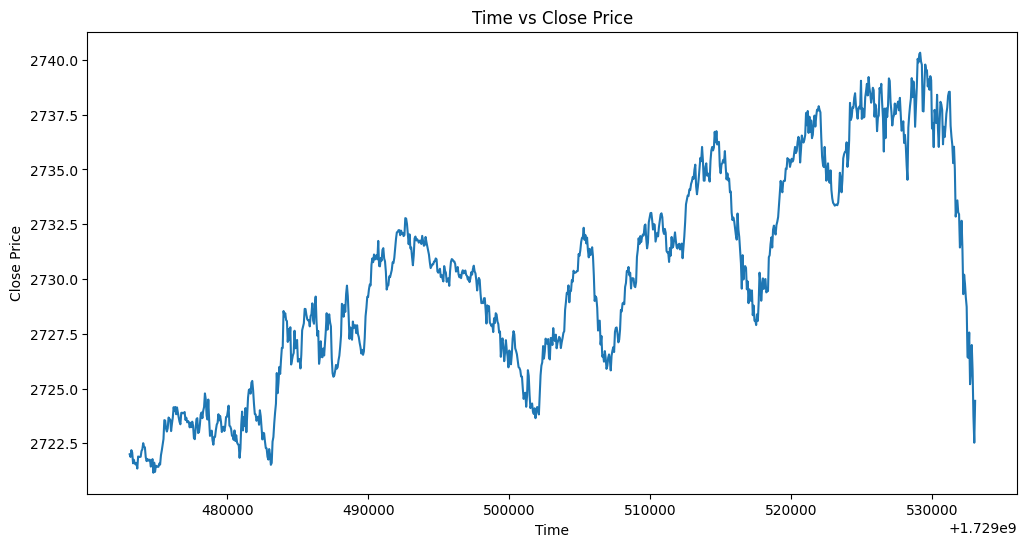

In [32]:
# Set figure size
plt.figure(figsize=(12, 6))

# Plot the data
plt.plot(df['time'], df['close'])

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Time vs Close Price')

# Show the plot
plt.show()


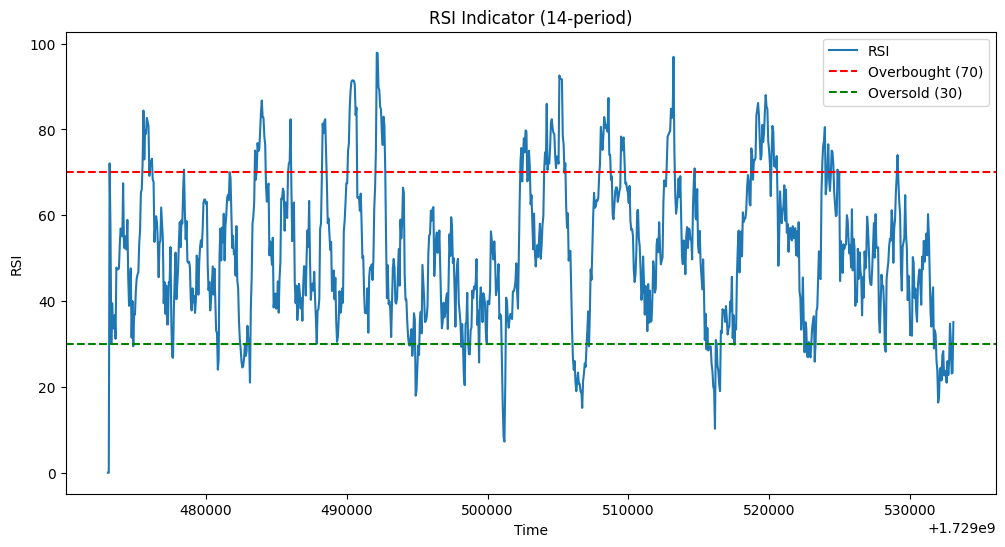

In [33]:
def calculate_rsi(df, period=14):
    delta = df['close'].diff()
    
    # Separate gains and losses
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    
    # Calculate the rolling averages of gains and losses
    avg_gain = gain.rolling(window=period, min_periods=1).mean()
    avg_loss = loss.rolling(window=period, min_periods=1).mean()
    
    # Calculate the Relative Strength (RS)
    rs = avg_gain / (avg_loss + 1e-10)  # Adding a small constant to avoid division by zero
    
    # Calculate the RSI
    rsi_14 = 100 - (100 / (1 + rs))
    
    # Append columns for avg_gain, avg_loss, RS, and RSI_14
    df['avg_gain'] = avg_gain
    df['avg_loss'] = avg_loss
    df['RS'] = rs
    df['RSI_14'] = rsi_14
    df['RSI'] = rsi_14  # Same as RSI for clarity
    
    return df

# Example Data (replace with your own DataFrame with 'close' prices)
# df = pd.DataFrame({'time': ..., 'close': ...})  # Replace with your actual data

# Calculate RSI (with 14-day period)
df = calculate_rsi(df)

# Plotting the RSI with thresholds 70 and 30
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['RSI'], label='RSI')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.xlabel('Time')
plt.ylabel('RSI')
plt.title('RSI Indicator (14-period)')
plt.legend()
plt.show()


In [34]:
df

,time,open,high,low,close,tick_volume,spread,real_volume,avg_gain,avg_loss,RS,RSI_14,RSI
0,1729473060,2720.99,2722.01,2720.99,2722.00,39,23,0,0.000000,-0.000000,0.000000,0.000000,0.000000
1,1729473120,2721.93,2722.11,2721.77,2721.88,35,27,0,0.000000,0.060000,0.000000,0.000000,0.000000
2,1729473180,2721.91,2722.31,2721.81,2722.19,47,31,0,0.103333,0.040000,2.583333,72.093023,72.093023
3,1729473240,2722.18,2722.41,2721.79,2722.08,44,19,0,0.077500,0.057500,1.347826,57.407407,57.407407
4,1729473300,2721.99,2721.99,2721.52,2721.59,31,15,0,0.062000,0.144000,0.430556,30.097087,30.097087
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1729532820,2725.76,2727.42,2725.42,2726.99,112,13,0,0.361429,0.679286,0.532072,34.728895,34.728895
996,1729532880,2726.98,2726.98,2725.22,2725.83,109,12,0,0.336429,0.762143,0.441425,30.624187,30.624187
997,1729532940,2725.49,2725.64,2723.63,2723.73,108,14,0,0.274286,0.912143,0.300705,23.118603,23.118603
998,1729533000,2723.68,2724.71,2722.28,2722.53,106,9,0,0.274286,0.904286,0.303318,23.272727,23.272727


In [35]:
class Position:
    def __init__(self):
        self.position_type = None  # None, 'buy', 'sell'
        self.entry_price = None    # Price when the position was opened
        self.exit_price = None     # Price when the position was closed
        self.entry_rsi = None      # RSI at the time of opening
        self.exit_rsi = None       # RSI at the time of closing

    def open_buy(self, price, rsi):
        """Open a buy position."""
        self.position_type = 'buy'
        self.entry_price = price
        self.entry_rsi = rsi
        print(f"Opened BUY position at price {price} and RSI {rsi}.")

    def open_sell(self, price, rsi):
        """Open a sell position."""
        self.position_type = 'sell'
        self.entry_price = price
        self.entry_rsi = rsi
        print(f"Opened SELL position at price {price} and RSI {rsi}.")

    def close_position(self, price, rsi):
        """Close the current position."""
        self.exit_price = price
        self.exit_rsi = rsi
        profit_loss = self.exit_price - self.entry_price if self.position_type == 'buy' else self.entry_price - self.exit_price
        print(f"Closed {self.position_type.upper()} position at price {price} and RSI {rsi}. P/L: {profit_loss:.2f}")

        # Store the trade details in case of a valid exit
        trade_info = {
            'position_type': self.position_type,
            'entry_price': self.entry_price,
            'exit_price': self.exit_price,
            'entry_rsi': self.entry_rsi,
            'exit_rsi': self.exit_rsi,
            'profit_loss': profit_loss
        }

        # Reset the position after storing trade info
        self.position_type = None
        self.entry_price = None
        self.exit_price = None
        self.entry_rsi = None
        self.exit_rsi = None

        return trade_info  # Return the trade info for tracking

    def update(self, price, rsi):
        """Update the position based on the RSI value."""
        closed_trade = None  # Initialize variable to hold closed trade info
        print(f"Current price: {price}, RSI: {rsi}, Position: {self.position_type}")
        
        if self.position_type is None:
            # Open a buy position if RSI is below 30
            if rsi <= 30:
                self.open_buy(price, rsi)
            # Open a sell position if RSI is above 70
            elif rsi >= 70:
                self.open_sell(price, rsi)
        elif self.position_type == 'buy':
            # Close buy position if RSI goes above 70
            if rsi >= 70:
                closed_trade = self.close_position(price, rsi)
        elif self.position_type == 'sell':
            # Close sell position if RSI goes below 30
            if rsi <= 30:
                closed_trade = self.close_position(price, rsi)

        return closed_trade  # Only return closed trade info


Current price: 2722.0, RSI: 0.0, Position: None
Opened BUY position at price 2722.0 and RSI 0.0.
Current price: 2721.88, RSI: 0.0, Position: buy
Current price: 2722.19, RSI: 72.09302320553125, Position: buy
Closed BUY position at price 2722.19 and RSI 72.09302320553125. P/L: 0.19
Current price: 2722.08, RSI: 57.40740736487716, Position: None
Current price: 2721.59, RSI: 30.09708736403269, Position: None
Current price: 2721.75, RSI: 39.49579829941036, Position: None
Current price: 2721.58, RSI: 34.55882351161773, Position: None
Current price: 2721.54, RSI: 33.57142855223934, Position: None
Current price: 2721.61, RSI: 36.73469385506292, Position: None
Current price: 2721.35, RSI: 31.213872814324816, Position: None
Current price: 2721.9, RSI: 47.80701752079705, Position: None
Current price: 2721.88, RSI: 47.39130432310277, Position: None
Current price: 2721.88, RSI: 47.39130432104228, Position: None
Current price: 2721.89, RSI: 47.61904759018478, Position: None
Current price: 2722.15, RS

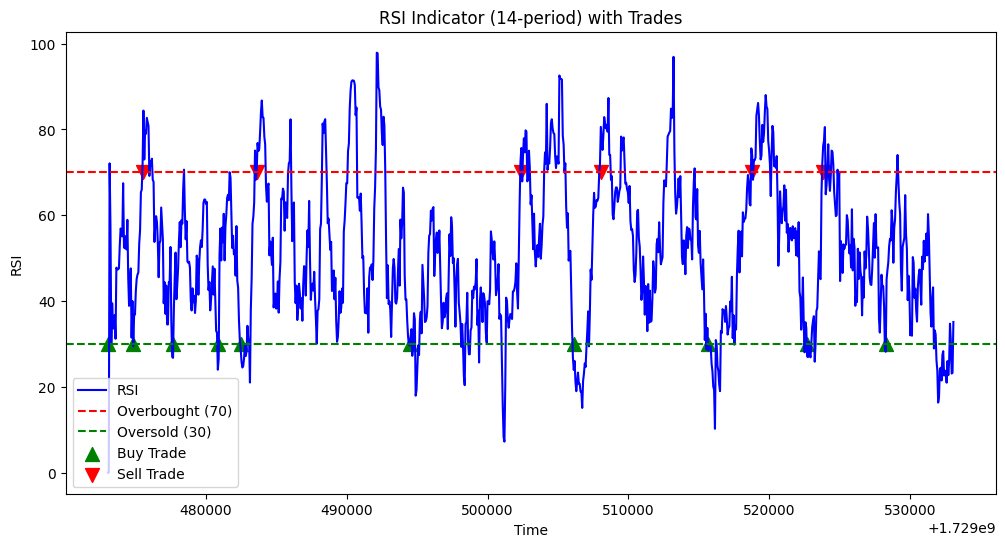

In [38]:
class Backtest:
    def __init__(self):
        self.trades = []

    def execute(self, df):
        position = Position()
        
        for index, row in df.iterrows():
            price = row['close']
            rsi = row['RSI']
            
            closed_trade = position.update(price, rsi)

            # Track trades
            if closed_trade is not None:
                self.trades.append(closed_trade)  # Append closed trade info directly

        return self.generate_summary()

    def generate_summary(self):
        total_trades = len(self.trades)
        total_profit = sum([trade['profit_loss'] for trade in self.trades])
        avg_profit_per_trade = total_profit / total_trades if total_trades > 0 else 0
        winners = len([trade for trade in self.trades if trade['profit_loss'] > 0])
        losers = len([trade for trade in self.trades if trade['profit_loss'] <= 0])
        
        return {
            'total_trades': total_trades,
            'total_profit': total_profit,
            'avg_profit_per_trade': avg_profit_per_trade,
            'winners': winners,
            'losers': losers,
            'win_rate': winners / total_trades * 100 if total_trades > 0 else 0
        }

# Function to calculate RSI
def calculate_rsi(df, period=14):
    delta = df['close'].diff()
    
    # Separate gains and losses
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    
    # Calculate the rolling averages of gains and losses
    avg_gain = gain.rolling(window=period, min_periods=1).mean()
    avg_loss = loss.rolling(window=period, min_periods=1).mean()
    
    # Calculate the Relative Strength (RS)
    rs = avg_gain / (avg_loss + 1e-10)  # Adding a small constant to avoid division by zero
    
    # Calculate the RSI
    rsi_14 = 100 - (100 / (1 + rs))
    
    # Append columns for avg_gain, avg_loss, RS, and RSI_14
    df['avg_gain'] = avg_gain
    df['avg_loss'] = avg_loss
    df['RS'] = rs
    df['RSI_14'] = rsi_14
    df['RSI'] = rsi_14  # Same as RSI for clarity
    
    return df

# Main execution
# Assume 'df' is your DataFrame containing 'time' and 'close' columns
df = calculate_rsi(df)

# Initialize and run the backtest
backtest = Backtest()
backtest_results = backtest.execute(df)

# Output the backtest results
print("Backtest Results:")
print(f"Total Trades: {backtest_results['total_trades']}")
print(f"Total Profit: {backtest_results['total_profit']:.2f}")
print(f"Average Profit per Trade: {backtest_results['avg_profit_per_trade']:.2f}")
print(f"Win Rate: {backtest_results['win_rate']:.2f}%")
print(f"Winners: {backtest_results['winners']}")
print(f"Losers: {backtest_results['losers']}")

# Plot RSI and trades
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['RSI'], label='RSI', color='blue')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')

# Mark trades on the plot
for trade in backtest.trades:
    entry_index = df[(df['close'] == trade['entry_price']) & (df['RSI'] == trade['entry_rsi'])].index[0]
    if trade['position_type'] == 'buy':
        plt.scatter(df['time'].iloc[entry_index], 30, marker='^', color='green', label='Buy Trade' if 'Buy Trade' not in plt.gca().get_legend_handles_labels()[1] else "", s=100)
    else:
        plt.scatter(df['time'].iloc[entry_index], 70, marker='v', color='red', label='Sell Trade' if 'Sell Trade' not in plt.gca().get_legend_handles_labels()[1] else "", s=100)

plt.xlabel('Time')
plt.ylabel('RSI')
plt.title('RSI Indicator (14-period) with Trades')
plt.legend()
plt.show()


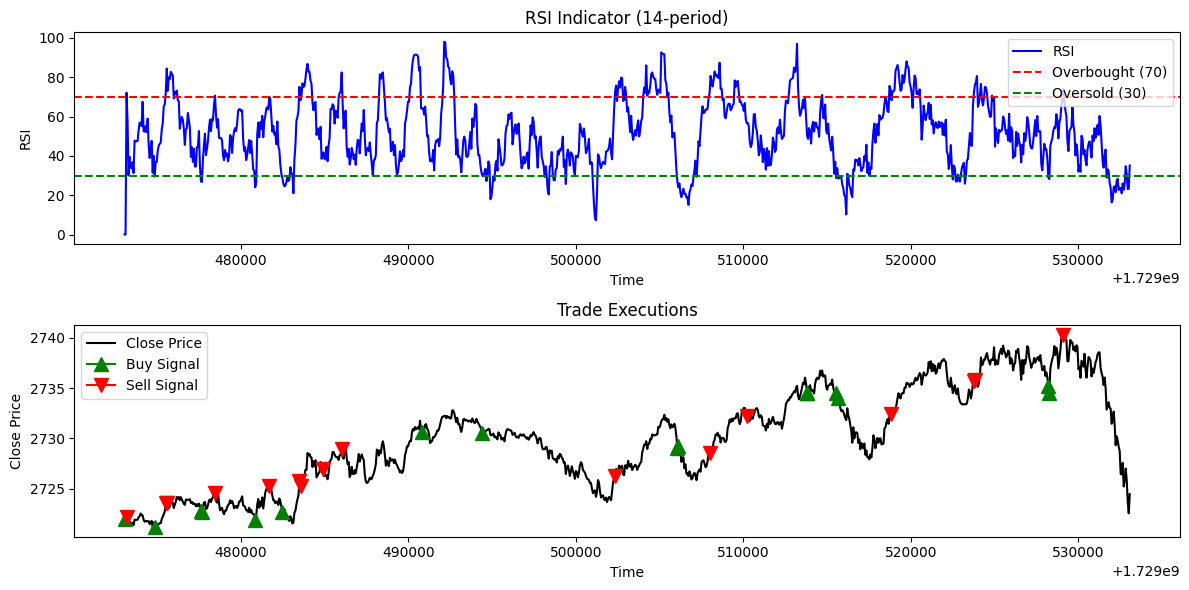

In [39]:
# Plot RSI and trades (optional)
plt.figure(figsize=(12, 6))

# Plot RSI
plt.subplot(2, 1, 1)
plt.plot(df['time'], df['RSI'], label='RSI', color='blue')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.xlabel('Time')
plt.ylabel('RSI')
plt.title('RSI Indicator (14-period)')
plt.legend()

# Plot trades
plt.subplot(2, 1, 2)
plt.plot(df['time'], df['close'], label='Close Price', color='black')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Trade Executions')

# Mark trades
for trade in backtest.trades:
    entry_time = df['time'][df['close'] == trade['entry_price']].values[0]
    exit_time = df['time'][df['close'] == trade['exit_price']].values[0]

    if trade['position_type'] == 'buy':
        plt.plot(entry_time, trade['entry_price'], marker='^', color='green', markersize=10, label='Buy Signal' if 'Buy Signal' not in plt.gca().get_legend_handles_labels()[1] else "")
        plt.plot(exit_time, trade['exit_price'], marker='v', color='red', markersize=10, label='Sell Signal' if 'Sell Signal' not in plt.gca().get_legend_handles_labels()[1] else "")
    elif trade['position_type'] == 'sell':
        plt.plot(entry_time, trade['entry_price'], marker='v', color='red', markersize=10, label='Sell Signal' if 'Sell Signal' not in plt.gca().get_legend_handles_labels()[1] else "")
        plt.plot(exit_time, trade['exit_price'], marker='^', color='green', markersize=10, label='Buy Signal' if 'Buy Signal' not in plt.gca().get_legend_handles_labels()[1] else "")

plt.legend()
plt.tight_layout()
plt.show()
